This article focuses on Principal Component Analysis and how we calculate the reduced dimensional feature set.
### PCA
PCA is a dimensionality reduction algorithm that transforms the data from higher dimensional space to lower dimensional space such that the maximum information (or variance) is captured in lower dimensional space. PCA is a feature extraction algorithm. It calculates new features by applying a linear transformation to existing features.
PCA is an unsupervised algorithm, PCA does not require any labelled dataset.

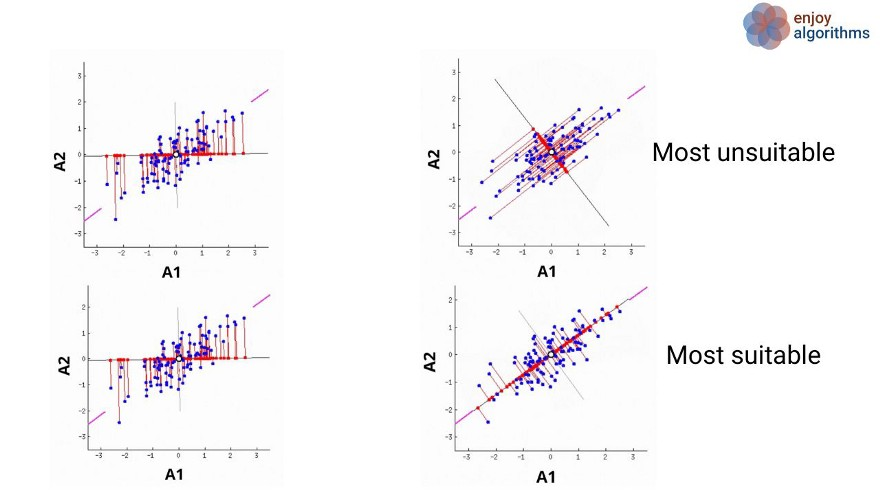

Reducing the dimension of the feature set comes with an expense of accuracy but the trick is to trade a little accuracy for simplicity. As You would have heard about the curse of the dimensionality problem when there are more dimensions present in the dataset, the model interpretability decreases, storage size, and computational power increases. The idea of PCA is to reduce the dimension to make everything simpler at the cost of a little accuracy.

PCA calculates Principal Components. Principal components are the direction in space along which projections are made from a higher dimensional feature set. Principal components are arranged in the order of decreasing variance. Therefore Principal component 1 will have the largest variance captured from the data, then Principal component 2 will have the second largest variance captured from the data, and so on.

PCA uses SVD (singular value decomposition) to find the principal components. After calculating the principal components, decide how many principal components are required. And multiply the data with the principal component matrix and you get your reduced dimensional feature set.
SVD Theorem: SVD theorem states that every matrix can be decomposed into a sequence of three elementary transformations: a rotation in input space U, a scaling matrix Σ, and a rotation matrix in output space V.
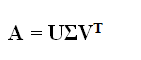

The Σ represents singular values and V is the matrix of eigenvectors which are known as principal components in PCA terminology.
Step-by-Step Calculation Behind PCA: 
We will use heart.csv dataset to perform PCA:

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv("heart.csv").drop('target', axis = 1)
columns = data.columns
data.dropna(how="all", inplace=True)
print(data.shape),
data.head()


#### Method 1: Using the SVD formula present in numpy.linalg class:
##### Step 1: Perform Standardization on your dataset:
The first step is to perform standardization on a given dataset so that each feature will have a variance equal to 1 and a mean of 0 and they contribute equally to the analysis. If the features will have large differences in variances then the feature having the largest variance will dominate the feature having a smaller variance which will lead to a biased result. Therefore standardization is performed before performing PCA. 
Standardization uses a z-score formula to standardize the data. Standardization transforms the data in such a way that it will have a mean zero and a standard deviation of 1. You can either use below formula ot sklear.preprocessing StandardScaler to standardarize data.

                `data_std = (data - data.mean(axis=0)) / data.std(axis=0)`
                
Standardization or z-scoreHere is the python implementation to standardize the data:

In [2]:
from sklearn.preprocessing import StandardScaler
# step 1: perform standardization on data
# data_std = (data - data.mean(axis=0)) / data.std(axis=0)
data_std = StandardScaler().fit_transform(data)

##### Step 2: Apply numpy.linalg.svd() function on your standardized dataset:

In [3]:
# svd generated v_transpose and sigma are in decreasing order of singular values
# i.e sigma is arranged in decreasing order and v_transpose is arranged in decrasing order of sigma
u, sigma, v_transpose = np.linalg.svd(data_std)
pc_svd = v_transpose.T # to get V, transpose v_transpose

##### Step 3: Check captured variance by each principal component:

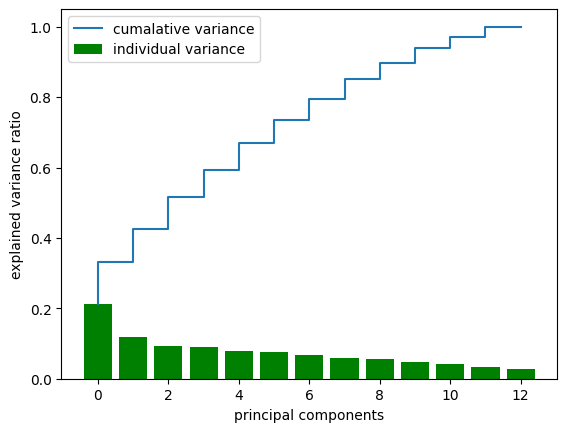

Explained variance ratio: [0.21254053121851943, 0.11820707724327446, 0.09406417688208968, 0.09085734711607027, 0.07861281076657611, 0.07461660513679604, 0.06636691747007137, 0.0596881060235926, 0.05530196187028442, 0.04781309120525298, 0.040777289585737606, 0.03254941390637679, 0.028604671575358055]


In [4]:
# eigen values are square of singular values generated from svd
eigen_values_svd = sigma**2
# calculate variance explained by each eigen value
total = sum(eigen_values_svd)
exp_variance_svd = [eig_val/total for eig_val in eigen_values_svd]
import matplotlib.pyplot as plt
def plot_variance(exp_variance):    
    cum_exp_variance = np.cumsum(exp_variance)
    plt.bar(range(len(exp_variance)), exp_variance, label = "individual variance", color= 'g')
    plt.step(range(len(cum_exp_variance)), cum_exp_variance, label = "cumalative variance")
    plt.ylabel("explained variance ratio")
    plt.xlabel("principal components")
    plt.legend()
    plt.show()
plot_variance(exp_variance_svd)
print("Explained variance ratio:",exp_variance_svd)

#### Step 4: Select K principal components and obtain a reduced dataset:
To cover 85% of the variability present in data, we need to select 10 principal components using the above graph. Select 10 principal components from starting of the principal component matrix and multiply the standardized dataset to obtain a reduced feature dimension dataset.

In [5]:
k = 10
data_svd_pca = np.dot(data_std, pc_svd[:,:k])
col = [f"PC {i+1}" for i in range(k)]
data_svd = pd.DataFrame(data_svd_pca, columns = col)
print("Reduced dimensional data set calculated through SVD method of PCA:")
data_svd.head()


Reduced dimensional data set calculated through SVD method of PCA:


,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
0,-0.624111,2.321270,2.474673,-2.676239,0.375253,-1.713567,-0.120352,-0.736557,0.638940,-0.932651
1,0.455988,-0.957351,1.139595,-2.426838,2.273767,0.787861,-0.081513,-1.535384,-1.241824,-1.165681
2,1.828805,0.042885,-0.452229,-0.406415,0.867802,-0.767551,-0.104852,0.063523,-1.293202,1.147066
3,1.716006,-0.495337,0.030631,0.112162,-0.235598,0.502665,-0.142754,0.177462,0.152965,-0.706572
4,0.371356,0.301156,-2.841069,0.809042,0.011389,0.085495,1.415596,-0.607134,0.186315,-0.907423


#### Method 2: Using the covariance matrix and eigenvalue decomposition:
##### Step 1: Perform Standardization on your dataset:



In [6]:
from sklearn.preprocessing import StandardScaler
# step 1: perform standardization on data
# data_std = (data - data.mean(axis=0)) / data.std(axis=0)
data_std = StandardScaler().fit_transform(data)

##### Step 2: Calculate Covariance Matrix:

In [7]:
n = data_std.shape[0]
# way 1:using numpy.cov() method
cov_direct = np.cov(data_std.T)
# way 2: using the mathematical formula of covariance matrix of statistics
# cov(x,y) = (Σ(Xi - X_mean)(Y - Y_mean))/((n - 1)*std(X)*std(Y))
# here mean and std for all features are 0 and 1 respectively
cov_formula_mat = 1/(n-1)*np.dot(data_std.T, data_std)
cov = cov_formula_mat

##### Step 3: Calculate eigenvalues and eignevectors of covariance matrix and sort eigenvalues and eigenvectors:

In [8]:

# Step 3: Calculate eigenvalues and eignevectors of covariance matrix
eigen_values_cov, eigen_vectors_cov = np.linalg.eig(cov)
# Step 4: sort eigenvectors in descending order of eigenvalues
# argsort() sorts the data in reverse order of eigenvalues and returns indices  
idx = eigen_values_cov.argsort()[::-1] 
eigen_values_cov = eigen_values_cov[idx]
# sorts eigenvectors in the descending order of eigenvalues. 
# these eigenvectors are known as principal components
# Note: numpy generate eigenvectors as column vector 
eigen_vectors_cov =  eigen_vectors_cov[:,idx]


##### Step 4: Check captured variance by each principal component:



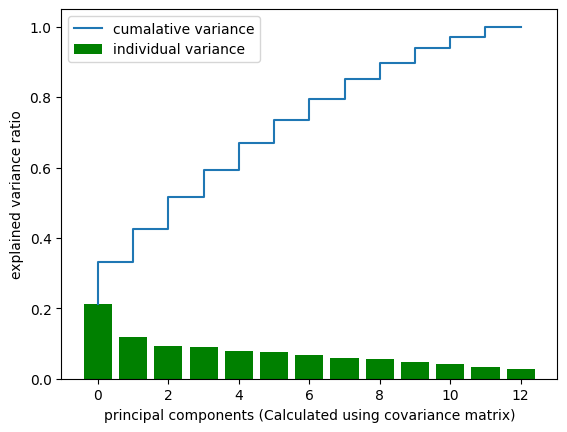

Explained variance ratio: [0.21254053121851987, 0.11820707724327478, 0.09406417688208972, 0.09085734711607002, 0.0786128107665759, 0.07461660513679615, 0.06636691747007122, 0.059688106023592535, 0.05530196187028437, 0.04781309120525293, 0.04077728958573758, 0.03254941390637674, 0.028604671575358134]


In [9]:
total = sum(eigen_values_cov)
exp_variance_cov = [eig_val/total for eig_val in eigen_values_cov]
import matplotlib.pyplot as plt
def plot_variance(exp_variance):    
    cum_exp_variance = np.cumsum(exp_variance)
    plt.bar(range(len(exp_variance)), exp_variance, label = "individual variance", color= 'g')
    plt.step(range(len(cum_exp_variance)), cum_exp_variance, label = "cumalative variance")
    plt.ylabel("explained variance ratio")
    plt.xlabel("principal components (Calculated using covariance matrix)")
    plt.legend()
    plt.show()
plot_variance(exp_variance_cov)
print("Explained variance ratio:",exp_variance_cov)

##### Step 5: Select K principal components and obtain a reduced dataset:

In [10]:
k = 10
data_cov_pca = np.dot(data_std, eigen_vectors_cov[:,:k])
col = [f"PC {i+1}" for i in range(k)]
data_cov = pd.DataFrame(data_cov_pca, columns = col)
print("Reduced dimensional data set calculated through covariance matrix method of PCA:")
data_cov.head()

Reduced dimensional data set calculated through covariance matrix method of PCA:


,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
0,0.624111,2.321270,2.474673,2.676239,-0.375253,-1.713567,0.120352,0.736557,0.638940,-0.932651
1,-0.455988,-0.957351,1.139595,2.426838,-2.273767,0.787861,0.081513,1.535384,-1.241824,-1.165681
2,-1.828805,0.042885,-0.452229,0.406415,-0.867802,-0.767551,0.104852,-0.063523,-1.293202,1.147066
3,-1.716006,-0.495337,0.030631,-0.112162,0.235598,0.502665,0.142754,-0.177462,0.152965,-0.706572
4,-0.371356,0.301156,-2.841069,-0.809042,-0.011389,0.085495,-1.415596,0.607134,0.186315,-0.907423


#### Method 3: Using the sklearn.decomposition PCA function:
##### Step 1: Perform Standardization on your dataset:



In [11]:
from sklearn.preprocessing import StandardScaler
# step 1: perform standardization on data
# data_std = (data - data.mean(axis=0)) / data.std(axis=0)
data_std = StandardScaler().fit_transform(data)

##### Step 2: Initialize PCA class object and calculate reduced dimensional dataset:

In [12]:
# import PCA class from sklearn.decomposition
from sklearn.decomposition import PCA
k = 10
# initialize PCA class object by specifying the n_components
# Note: n_component should be greater or equal to 1 and less than equal to number of features present in the dataset
pca = PCA(n_components =k)
data_pca = pca.fit_transform(data_std) # fit the pca on data then transforms the data
data_pca_df = pd.DataFrame(data_pca, columns = [f'pc {i+1}' for i in range(k)])
print("Reduced dimensional data set calculated through sklearn.decomposition PCA class:")
data_pca_df.head()

Reduced dimensional data set calculated through sklearn.decomposition PCA class:


,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10
0,0.624111,2.321270,2.474673,2.676239,0.375253,1.713567,-0.120352,0.736557,-0.638940,0.932651
1,-0.455988,-0.957351,1.139595,2.426838,2.273767,-0.787861,-0.081513,1.535384,1.241824,1.165681
2,-1.828805,0.042885,-0.452229,0.406415,0.867802,0.767551,-0.104852,-0.063523,1.293202,-1.147066
3,-1.716006,-0.495337,0.030631,-0.112162,-0.235598,-0.502665,-0.142754,-0.177462,-0.152965,0.706572
4,-0.371356,0.301156,-2.841069,-0.809042,0.011389,-0.085495,1.415596,0.607134,-0.186315,0.907423


In [13]:
for singular_val, principal_component, variance_captured in zip(pca.singular_values_,pca.components_, pca.explained_variance_ratio_):
    print(f" {np.round(variance_captured*100,2)}% variance captured for singular value {singular_val} by principal component:\n{principal_component} ")

 21.25% variance captured for singular value 28.93435937548552 by principal component:
[ 0.31420252  0.09083783 -0.27460749  0.18392019  0.11737503  0.07363999
 -0.12772792 -0.41649811  0.36126745  0.41963899 -0.37977222  0.27326172
  0.22202375] 
 11.82% variance captured for singular value 21.578175948426654 by principal component:
[ 0.40614872 -0.37779171  0.29726609  0.43818675  0.36451402  0.31743328
 -0.22088181  0.07787618 -0.2631179  -0.05225497  0.04837415  0.09414721
 -0.20072042] 
 9.41% variance captured for singular value 19.24886471297857 by principal component:
[-0.09407661  0.55484915  0.35697431  0.2038493  -0.40782498  0.48173624
 -0.08919083  0.15825529 -0.1263561   0.1103429  -0.07381839  0.18356934
  0.12501113] 
 9.09% variance captured for singular value 18.917903961332506 by principal component:
[-0.0206618  -0.25530873  0.28790041  0.02260103 -0.34340982 -0.06860532
  0.26609555 -0.18412539 -0.11505621  0.32629597 -0.49484894 -0.32801632
 -0.38919138] 
 7.86% v